**Trabalho Final - O dataset IRIS**

- Classes:	            3
- Amostras por classe:	50
- Total de amostras	    150
- Dimensionalidade:	    4
- Tipo das features:	    números reais positivos

O conjunto de dados IRIS talvez seja o mais clássico dos conjuntos de testes de algoritmos de **classificação**. Ele divide amostras de plantas em três espécies diferentes e tem, como features, a altura e largura de duas partes da planta: a sépala e as pétalas.

Neste trabalho, você deve classificar esse conjunto de dados com pelo menos dois algoritmos. Você deverá analisá-los segundo as métricas de qualidade que julgar relevantes, e utilizar técnicas de busca de hiperparâmetros e validação cruzada para tornar seus resultados mais robustos. As perguntas abaixo guiarão seus trabalhos.

Lembre-se de que a qualidade do seu trabalho será medida, principalmente, de acordo com suas explicações e justificativas. O resultado final do seu algoritmo, embora espere-se que seja satisfatório, é menos importante.

**Fonte**: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

**Observação**: Gerar gráficos que expliquem e ilustrem o seu problema não é parte obrigatória da resolução do trabalho, mas é um treino bastante recomendado.

In [46]:
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

In [47]:
import pandas as pd
import numpy as np

pd.set_option('display.height', 300)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 800)

### Dados (Dataset)

In [48]:
df = pd.DataFrame(iris.data)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Classificações

In [49]:
df = pd.DataFrame(iris.target)
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [50]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [51]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(iris.data, iris.target, test_size=0.3, random_state=13)

print("Amostras para treinamento: {}".format(len(train)))
print("Amostras para teste: {}".format(len(test)))

Amostras para treinamento: 105
Amostras para teste: 45


In [52]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier()
dtree_model = dtree.fit(train, train_labels)
dtree_predictions = dtree_model.predict(test)

In [53]:
from sklearn import svm

svc = svm.SVC()

svm_model = svc.fit(train, train_labels)
svm_predictions = svm_model.predict(test)

In [54]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb_model = gnb.fit(train, train_labels)
gnb_predictions = gnb_model.predict(test)

In [55]:
from sklearn.metrics import accuracy_score

print("Acuracia do modelo Arvore de decisao: {}".format(accuracy_score(test_labels, dtree_predictions)))
print("Acuracia do modelo SVM: {}".format(accuracy_score(test_labels, svm_predictions)))
print("Acuracia do modelo Naive Bayes: {}".format(accuracy_score(test_labels, gnb_predictions)))

Acuracia do modelo Arvore de decisao: 0.9777777777777777
Acuracia do modelo SVM: 0.9777777777777777
Acuracia do modelo Naive Bayes: 0.9555555555555556


In [56]:
from sklearn.metrics import precision_score

print("Precisao do modelo Arvore de decisao: {}".format(precision_score(test_labels, dtree_predictions, average='weighted')))
print("Precisao do modelo SVM: {}".format(precision_score(test_labels, svm_predictions, average='weighted')))
print("Precisao do modelo Naive Bayes: {}".format(precision_score(test_labels, gnb_predictions, average='weighted')))

Precisao do modelo Arvore de decisao: 0.9794871794871796
Precisao do modelo SVM: 0.9794871794871796
Precisao do modelo Naive Bayes: 0.9619047619047619


In [57]:
from sklearn.metrics import recall_score

print("Recall do modelo Arvore de decisao: {}".format(recall_score(test_labels, dtree_predictions, average='weighted')))
print("Recall do modelo SVM: {}".format(recall_score(test_labels, svm_predictions, average='weighted')))
print("Recall do modelo Naive Bayes: {}".format(recall_score(test_labels, gnb_predictions, average='weighted')))

Recall do modelo Arvore de decisao: 0.9777777777777777
Recall do modelo SVM: 0.9777777777777777
Recall do modelo Naive Bayes: 0.9555555555555556


In [58]:
# Na validação cruzada
from sklearn.model_selection import cross_val_score

cv_dtree = cross_val_score(dtree, iris.data, iris.target)
cv_svc = cross_val_score(svc, iris.data, iris.target)
cv_gnb = cross_val_score(gnb, iris.data, iris.target)

print("Validação cruzada do modelo Arvore de decisao: {}".format(cv_dtree))
print("Média: {}".format(np.mean(cv_dtree)))
print("\nValidação cruzada do modelo SVM: {}".format(cv_svc))
print("Média: {}".format(np.mean(cv_svc)))
print("\nValidação cruzada do modelo Naive Bayes: {}".format(cv_gnb))
print("Média: {}".format(np.mean(cv_gnb)))


Validação cruzada do modelo Arvore de decisao: [0.98039216 0.92156863 0.97916667]
Média: 0.960375816993464

Validação cruzada do modelo SVM: [0.98039216 0.96078431 0.97916667]
Média: 0.9734477124183006

Validação cruzada do modelo Naive Bayes: [0.92156863 0.90196078 0.97916667]
Média: 0.9342320261437909


best parameters: {'C': 1}
best score:      0.98000 (+/-0.03055)


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,...,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000670,0.000259,0.980000,0.985926,1,{'C': 1},1,...,0.992593,1.0,0.977778,0.000064,0.000020,0.030551,0.005185
1,0.000605,0.000242,0.980000,0.988148,2,{'C': 2},1,...,0.992593,1.0,0.985185,0.000018,0.000007,0.030551,0.004914
2,0.000598,0.000246,0.973333,0.988889,3,{'C': 3},3,...,0.992593,1.0,0.992593,0.000024,0.000011,0.032660,0.005972
3,0.000584,0.000243,0.973333,0.985185,4,{'C': 4},3,...,0.970370,1.0,0.992593,0.000015,0.000006,0.032660,0.008114
4,0.000598,0.000243,0.973333,0.982222,5,{'C': 5},3,...,0.977778,1.0,0.977778,0.000023,0.000007,0.044222,0.006789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,0.000626,0.000244,0.973333,0.978519,8,{'C': 8},3,...,0.970370,1.0,0.970370,0.000109,0.000012,0.044222,0.006988
8,0.000591,0.000241,0.973333,0.977778,9,{'C': 9},3,...,0.970370,1.0,0.970370,0.000025,0.000011,0.044222,0.008765
9,0.000587,0.000237,0.973333,0.977037,10,{'C': 10},3,...,0.970370,1.0,0.970370,0.000020,0.000001,0.044222,0.007734
10,0.000592,0.000238,0.973333,0.976296,11,{'C': 11},3,...,0.970370,1.0,0.970370,0.000024,0.000004,0.044222,0.007258


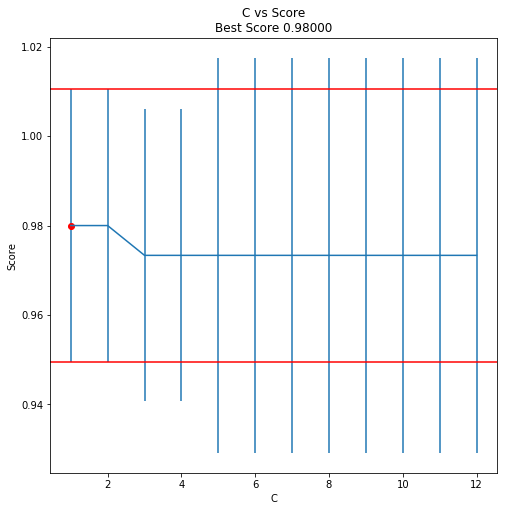

In [60]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

from matplotlib      import pyplot as plt
from IPython.display import display
import pandas as pd

def GridSearch_table_plot(grid_clf, param_name):

    from matplotlib      import pyplot as plt
    from IPython.display import display
    import pandas as pd
    
    num_results=15

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_

    clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))

    # pick out the best results
    # =========================
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    best_row = scores_df.iloc[0, :]
    best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]

    # display the top 'num_results' results
    # =====================================
    display(pd.DataFrame(cv_results) \
            .sort_values(by='rank_test_score').head(num_results))

    # plot the results
    # ================
    scores_df = scores_df.sort_values(by='param_' + param_name)

    means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    # plot
    plt.figure(figsize=(8, 8))
    plt.errorbar(params, means, yerr=stds)

    plt.axhline(y=best_mean + best_stdev, color='red')
    plt.axhline(y=best_mean - best_stdev, color='red')
    plt.plot(best_param, best_mean, 'or')

    plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
    plt.xlabel(param_name)
    plt.ylabel('Score')
    plt.show()
        
grid_clf = GridSearchCV(estimator  = svm.SVC(), 
                        param_grid = {'C': range(1,13)}, 
                        cv         = 10)

_ = grid_clf.fit(iris.data, iris.target)

GridSearch_table_plot(grid_clf, "C")

**Após a construção do seu algoritmo, responda às perguntas abaixo:**


**1) Quais métricas de qualidade você julgou relevantes para a análise dos seus algoritmos? Quais você não julgou relevantes? Explique.**

As métricas utilizadas foram:

* Acurária: Para determinar a proporção de classificações corretas.
* Precisão: Quantas (proporção) positivas foram classificadas corretamente (verdadeiras ou falsas).
* Recall: Qual a proporção de positivos verdadeiro dentro das amostras positivas.


**2) Que técnica de busca de hiperparâmetros você utilizou? Avalie seus resultados, e explique como a técnica funciona.**

Foi utilizado o Grid Search (Busca exaustiva), que comprovou que o modelo SVM possui uma taxa de acerto entre 95% à 98%.

**3) Que técnica de validação cruzada você utilizou? Avalie seus resultados, e explique como a técnica funciona.**

Foi utilizado o Cross Valitation Score, que separa as amostras em 3 grupos e verifica o score resultado do modelo criado.
Foi verificado que embora nas métricas de acurácia, precisão e recall do modelo Árvore de decisão e SVM foram iguais (com valores próximos a 97%), na validação cruzada o SVM foi melhor, mantendo 97% de acerto.


**4) De forma sucinta, resuma o processo de desenvolvimento da solução apresentada, do entendimento do problema à proposta da solução. Descreva os passos de sua análise, e como cada um te ajudou a encontrar sua solução.**

As 150 amostras foram separadas em 105 para treinamento e 45 para testes (Método 70%/30%).
Com as mesmas amostras foram criados 3 modelos com algoritmos distintos: Árvore de decisão, SVM e Naive Bayes.
Comparado as métricas de qualidade dos 3, foi verificado que o modelo 1 e 2 tiveram o mesmo score para as amostragens informadas.
Entretanto a média dos valores da validação cruzada foi melhor no SVM.
Foi verificado os hiperparâmetros para o modelo SVM (como ele reagia a dados desconhecidos) e o resultado continuou bom.
